In [ ]:
# Generate random walk
import matplotlib.pyplot as plt
import random

def generate_random_walk(length=100, mu=0, sig=1):
    ts = []
    for i in range(length):
        e = random.gauss(mu, sig)
        if i == 0:
            ts.append(e)
        else:
            ts.append(ts[i-1] + e)
    return ts

if __name__ == "__main__":
    random.seed(10)
    random_walk = generate_random_walk()
    plt.plot(random_walk)
    plt.show()

In [ ]:
# Trend
random.seed(10)
length = 50
a = 5
b = 0.5
c = 3
trend = [a + b * i for i in range(length)]
noise = [c * random.gauss(0, 1) for _ in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

In [ ]:
from math import log
random.seed(1)
length = 100
a = 2
b = 25
c = 5
noise = [c * random.gauss(0, 1) for _ in range(length)]
trend = [a + b * log(i) for i in range(1, length + 1)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

In [ ]:
from math import sin

random.seed(10)
length = 100
a = 50
b = -0.05
c = 1
s = 3
trend = [a + b * i for i in range(length)]
seasons = [s * sin(i/5) for i in range(length)]
noise = [c * random.gauss(0, 1) for _ in range(length)]
ts = [trend[i] + seasons[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()


In [ ]:
# Autoregressive model

from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf
quotes = yf.download('META', start='2011-01-01', end='2021-12-31')
model = AutoReg(quotes['Close'], lags=2)
model_fit = model.fit()
print(model_fit.params)

In [ ]:
# Autoregressive integrated moving average model

from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from_date = '2015-01-01'
to_date = '2020-10-01'
quotes = yf.download('META', start=from_date, end=to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]
model = ARIMA(train, order=(5,2,3))
results = model.fit()
forecast = results.forecast()
predicted = forecast[0]
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$') 

In [ ]:
# Seasonal autoregressive integrated moving average

from statsmodels.tsa.statespace.sarimax import SARIMAX
import yfinance as yf
from_date = '2015-01-01'
to_date = '2020-10-01'
quotes = yf.download('META', start=from_date, end=to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]
model = SARIMAX(train, order=(3,1,1), seasonal_order=(0,0,0,0))
results = model.fit(disp=0)
forecast = results.forecast()
predicted = forecast[0]
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

In [ ]:
# Holt Winters Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf
from_date = '2015-01-01'
to_date = '2020-10-01'
quotes = yf.download('META', start=from_date, end=to_date)
closes = quotes['Close'].values
train, test = closes[:-1], closes[-1]
model = ExponentialSmoothing(train)
results = model.fit()
forecast = results.forecast()
predicted = forecast[0]
print(f'Predicted Price on {to_date}: {round(predicted, 2)}$')
print(f'Actual Price on {to_date}: {round(test, 2)}$')

In [ ]:
import random
import torch
from math import sin, cos
import matplotlib.pyplot as plt

def get_time_series_data(length):
    a = 0.2
    b = 300
    c = 20
    ls = 5
    ms = 20
    gs = 100
    ts = []
    for i in range(length):
        ts.append(b + a * i + ls * sin(i/5) + ms * cos(i/24) + gs * sin(i/120) + c * random.random())
    return ts

data = get_time_series_data(3000)
plt.plot(data)
plt.show()



In [1]:
# Model comparison

import copy
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from math import sin, cos
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def get_time_series_data(length):
    a = 0.2
    b = 300
    c = 20
    ls = 5
    ms = 20
    gs = 100
    ts = []
    for i in range(length):
        ts.append(b + a * i + ls * sin(i/5) + ms * cos(i/24) + gs * sin(i/120) + c * random.random())
    return ts

def get_time_series_datasets(features, ts_len):
    ts = get_time_series_data(ts_len)
    X = []
    y = []
    for i in range(features + 1, ts_len):
        X.append(ts[i - (features + 1):i - 1])
        y.append(ts[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    X_train = torch.tensor(data=X_train)
    y_train = torch.tensor(data=y_train)
    X_val = torch.tensor(data=X_val)
    y_val = torch.tensor(data=y_val)
    X_test = torch.tensor(data=X_test)
    y_test = torch.tensor(data=y_test)
    return X_train, y_train, X_val, y_val, X_test, y_test

class FCNN(torch.nn.Module):
    def __init__(self, n_inp, l_1, l_2, n_out):
        super(FCNN, self).__init__()
        self.lin1 = torch.nn.Linear(n_inp, l_1)
        self.lin2 = torch.nn.Linear(l_1, l_2)
        self.lin3 = torch.nn.Linear(l_2, n_out)
    def forward(self, x):
        x1 = F.relu(self.lin1(x))
        x2 = F.relu(self.lin2(x1))
        y = self.lin3(x2)
        return y
    
class DummyPredictor(torch.nn.Module):
    def forward(self,x):
        last_values = []
        for r in x.tolist():
            last_values.append([r[-1]])
        return torch.tensor(data=last_values)
    
from scipy import interpolate
class InterpolationPredictor(torch.nn.Module):
    def forward(self,x):
        last_values = []
        values = x.tolist()
        for v in values:
            x = np.arange(0, len(v))
            y = interpolate.interp1d(x, v, fill_value='extrapolate')
            last_values.append([y(len(v)).tolist()])
        return torch.tensor(data=last_values)
    
class HwesPredictor(torch.nn.Module):
    def forward(self, x):
        last_values = []
        for r in x.tolist():
            model = ExponentialSmoothing(r)
            results = model.fit()
            forecast = results.forecast()
            last_values.append([forecast[0]])
        return torch.tensor(data=last_values)

epoch 0: train - 287261.5938, val: - 468011.875
epoch 1000: train - 150.4289, val: - 147.0819
epoch 2000: train - 42.3347, val: - 42.9619
epoch 3000: train - 37.5835, val: - 39.734
epoch 4000: train - 38.2156, val: - 63.2065
epoch 5000: train - 35.2906, val: - 37.9096
epoch 6000: train - 34.9535, val: - 37.971
epoch 7000: train - 95.9254, val: - 136.5034
epoch 8000: train - 34.676, val: - 37.9359
epoch 9000: train - 34.5576, val: - 38.1525
Testing
FCNN Loss: 38.05195617675781
Dummy Loss: 75.77690887451172
Linear Interpolation Loss: 220.05862426757812
HWES Loss: 59.237033413917935


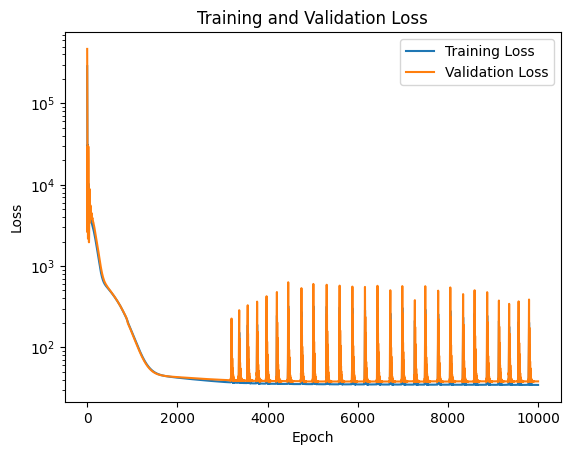

In [2]:
random.seed(1)
torch.manual_seed(1)
# 256 is the sliding window size and 3000 is the time series length
features = 256
ts_len = 3000
X_train, y_train, X_val, y_val, X_test, y_test = get_time_series_datasets(features, ts_len)

net = FCNN(n_inp=features, l_1=64, l_2=32, n_out=1)
net.train()
dummy_predictor = DummyPredictor()
interpolation_predictor = InterpolationPredictor()
hwes_predictor = HwesPredictor()

optimizer = torch.optim.Adam(params=net.parameters())
loss_func = torch.nn.MSELoss()

best_model = None
min_val_loss = 1000000

training_loss = []
validation_loss = []

for t in range(10000):
    prediction = net(X_train).squeeze()  # Squeezing the output to match target dimension
    loss = loss_func(prediction, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    val_prediction = net(X_val).squeeze()
    val_loss = loss_func(val_prediction, y_val)

    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())
    if val_loss.item() < min_val_loss:
        min_val_loss = val_loss.item()
        best_model = copy.deepcopy(net)
    if t % 1000 == 0:
        print(f'epoch {t}: train - {round(loss.item(), 4)}, val: - {round(val_loss.item(), 4)}')

net.eval()
test_prediction = best_model(X_test).squeeze()
test_loss = loss_func(test_prediction, y_test)
print('Testing')
print(f'FCNN Loss: {test_loss.item()}')
print(f'Dummy Loss: {loss_func(dummy_predictor(X_test).squeeze(), y_test).item()}')
print(f'Linear Interpolation Loss: {loss_func(interpolation_predictor(X_test).squeeze(), y_test).item()}')
print(f'HWES Loss: {loss_func(hwes_predictor(X_test).squeeze(), y_test).item()}')

plt.title("Training and Validation Loss")
plt.yscale("log")  # Using log scale to better visualize changes
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

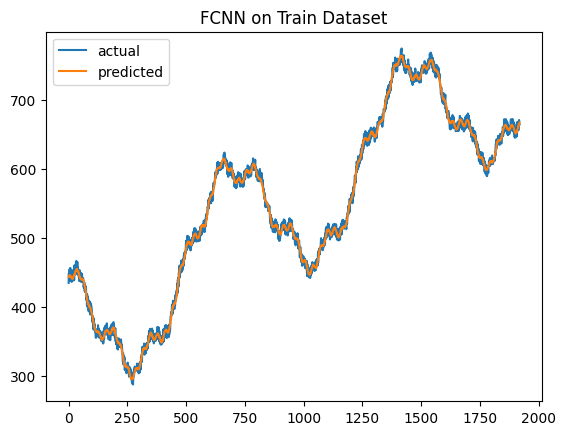

In [3]:
plt.title("FCNN on Train Dataset")
plt.plot(y_train, label='actual')
plt.plot(best_model(X_train).tolist(), label='predicted')
plt.legend()
plt.show()

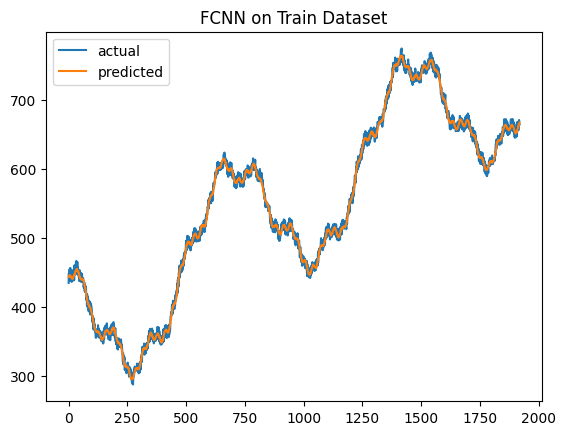

In [4]:
plt.title("FCNN on Train Dataset")
plt.plot(y_train, label='actual')
plt.plot(best_model(X_train).tolist(), label='predicted')
plt.legend()
plt.show()

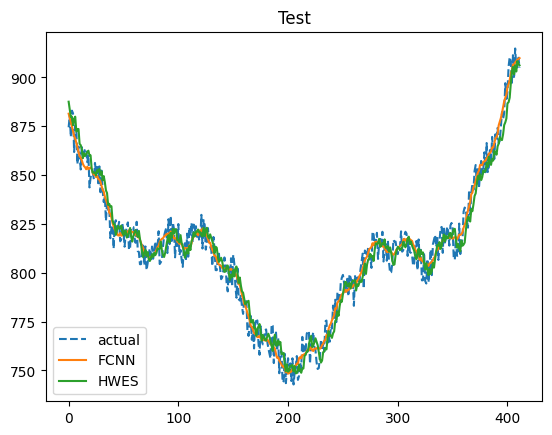

In [5]:
plt.title('Test')
plt.plot(y_test, '--', label='actual')
plt.plot(best_model(X_test).tolist(), label='FCNN')
plt.plot(hwes_predictor(X_test).tolist(), label='HWES')
plt.legend()

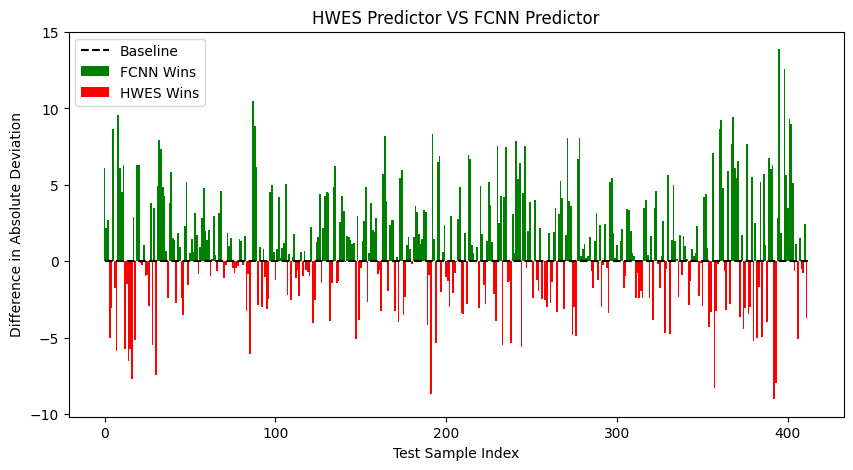

In [8]:
# Ensure model outputs and targets have the same shape
net_pred = best_model(X_test).squeeze()
hwes_pred = hwes_predictor(X_test).squeeze()

# Calculate absolute deviations
net_abs_dev = (net_pred - y_test).abs()
hwes_abs_dev = (hwes_pred - y_test).abs()

# Compute differences to determine which model performs better on each test sample
diff_pos = F.relu(hwes_abs_dev - net_abs_dev).reshape(-1).tolist()  # Positive differences where FCNN is better
diff_min = (-F.relu(net_abs_dev - hwes_abs_dev)).reshape(-1).tolist()  # Negative differences where HWES is better

test_n = len(y_test)  # Number of test samples

# Plotting the comparison
plt.figure(figsize=(10, 5))  # Set a larger figure size for better visibility
plt.title('HWES Predictor VS FCNN Predictor')
plt.hlines(0, xmin=0, xmax=test_n, linestyles='dashed', colors='black', label='Baseline')
plt.bar(list(range(test_n)), diff_pos, color='g', label='FCNN Wins', width=1.0)
plt.bar(list(range(test_n)), diff_min, color='r', label='HWES Wins', width=1.0)
plt.legend()
plt.xlabel('Test Sample Index')
plt.ylabel('Difference in Absolute Deviation')
plt.show()